In [1]:
# Importing basic packages and setting visualization properties
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
np.random.seed(777)
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

<hr style="border:2px solid #04d9ff">

### 1. Selecting stocks for the portfolio
Stocks were selected based on one specific criteria, i.e. well performing stocks within the solar panel industry. This theme was chosen on the basis of ESG factor outperforming the broad market. More precisely, it is focused on the time period when the Korean President announced support for the solar panel industry to remove reliance on nuclear energy.

### 2. Collect daily return data
Data for 10 Korean stocks within KOSPI and KOSDAQ were collected using the TS2000 application.
$$\frac{P_i - P_{i-1}}{P_{i-1}}$$

In [2]:
# Importing data to a dataframe and organizing
data = pd.read_csv("데이터.csv", encoding='cp949')
data.drop([0,1,2], inplace=True)
data.rename(columns={'회사명':'Date'}, inplace=True)
data.set_index("Date", inplace=True)
data = data.apply(pd.to_numeric)
data.head()

,나노신소재,대성파인텍,대주전자재료,신성이엔지보통주,아바코,알에스오토메이션,주성엔지니어링,주식회사케이씨씨,코미코,한화솔루션보통주
Date,,,,,,,,,,
2020/05/04,12450,1155,19300,886,6400,7120,5260,159500,24100,13800
2020/05/06,12900,1215,20400,910,6390,7600,5400,157500,25400,14000
2020/05/07,13200,1225,21100,905,6630,7630,5580,157500,26400,14300
2020/05/08,13200,1225,21300,906,6640,7840,5790,157500,26050,14300
2020/05/11,12950,1230,21250,943,6580,7830,5640,153000,27500,14950


Text(0, 0.5, 'daily returns')

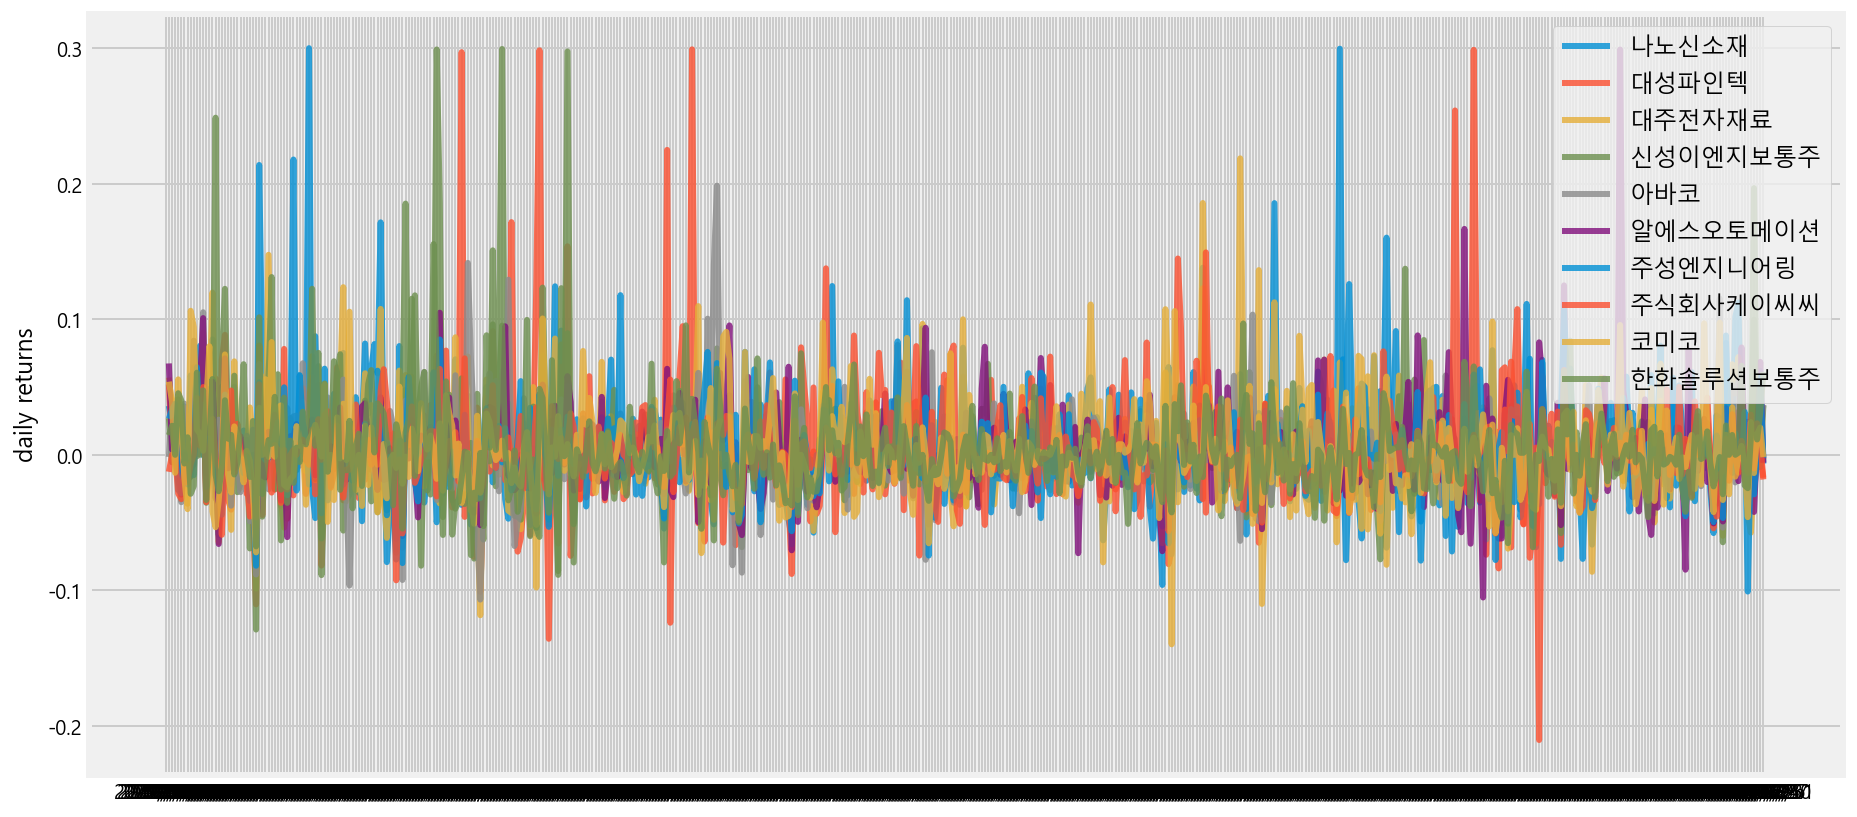

In [3]:
# Plot daily percentage change for all stocks
returns = data.pct_change()
plt.figure(figsize=(14, 7))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')

<hr style="border:2px solid #04d9ff">


### 3. Calculating the mean and variance of returns of each stock and constructing the covariance matrix using collected daily return data

In [4]:
# Calculate mean of daily returns for each stock
mean_returns = returns.mean()
mean_returns

나노신소재       0.004757
대성파인텍       0.002192
대주전자재료      0.003695
신성이엔지보통주    0.002707
아바코         0.001824
알에스오토메이션    0.002266
주성엔지니어링     0.003249
주식회사케이씨씨    0.002001
코미코         0.002298
한화솔루션보통주    0.002515
dtype: float64

In [5]:
# Calculate variance of daily returns for each stock
returns.var()

나노신소재       0.001786
대성파인텍       0.002075
대주전자재료      0.001431
신성이엔지보통주    0.001855
아바코         0.001010
알에스오토메이션    0.001167
주성엔지니어링     0.001102
주식회사케이씨씨    0.000964
코미코         0.001006
한화솔루션보통주    0.000992
dtype: float64


$$cov_{x,y} = \frac{\sum(x_i – \bar{x})(y_i – \bar{y})}{N-1}$$

In [6]:
# Calculate the covariance matrix
cov_matrix = returns.cov()
cov_matrix

,나노신소재,대성파인텍,대주전자재료,신성이엔지보통주,아바코,알에스오토메이션,주성엔지니어링,주식회사케이씨씨,코미코,한화솔루션보통주
나노신소재,0.001786,0.000394,0.001021,0.000257,0.000299,0.000293,0.000227,0.000129,0.000291,0.000364
대성파인텍,0.000394,0.002075,0.000343,0.000699,0.000394,0.000340,0.000379,0.000242,0.000262,0.000507
대주전자재료,0.001021,0.000343,0.001431,0.000303,0.000329,0.000316,0.000210,0.000127,0.000322,0.000321
신성이엔지보통주,0.000257,0.000699,0.000303,0.001855,0.000332,0.000325,0.000234,0.000171,0.000212,0.000590
아바코,0.000299,0.000394,0.000329,0.000332,0.001010,0.000271,0.000345,0.000202,0.000215,0.000248
알에스오토메이션,0.000293,0.000340,0.000316,0.000325,0.000271,0.001167,0.000337,0.000232,0.000294,0.000294
주성엔지니어링,0.000227,0.000379,0.000210,0.000234,0.000345,0.000337,0.001102,0.000260,0.000319,0.000292
주식회사케이씨씨,0.000129,0.000242,0.000127,0.000171,0.000202,0.000232,0.000260,0.000964,0.000119,0.000261
코미코,0.000291,0.000262,0.000322,0.000212,0.000215,0.000294,0.000319,0.000119,0.001006,0.000235
한화솔루션보통주,0.000364,0.000507,0.000321,0.000590,0.000248,0.000294,0.000292,0.000261,0.000235,0.000992


# Correlation Matrix
$$\rho_{x,y} = \frac{\sigma_{x,y}}{\sqrt{\sigma^2_x\sigma^2_y}}$$

Below is a heatmap of the correlation matrix

In [7]:
corr_matrix = returns.corr()

cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr_matrix.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .format(precision=2)\
    .set_table_styles(magnify())

,나노신소재,대성파인텍,대주전자재료,신성이엔지보통주,아바코,알에스오토메이션,주성엔지니어링,주식회사케이씨씨,코미코,한화솔루션보통주
나노신소재,1.00,0.20,0.64,0.14,0.22,0.20,0.16,0.10,0.22,0.27
대성파인텍,0.20,1.00,0.20,0.36,0.27,0.22,0.25,0.17,0.18,0.35
대주전자재료,0.64,0.20,1.00,0.19,0.27,0.24,0.17,0.11,0.27,0.27
신성이엔지보통주,0.14,0.36,0.19,1.00,0.24,0.22,0.16,0.13,0.16,0.43
아바코,0.22,0.27,0.27,0.24,1.00,0.25,0.33,0.20,0.21,0.25
알에스오토메이션,0.20,0.22,0.24,0.22,0.25,1.00,0.30,0.22,0.27,0.27
주성엔지니어링,0.16,0.25,0.17,0.16,0.33,0.30,1.00,0.25,0.30,0.28
주식회사케이씨씨,0.10,0.17,0.11,0.13,0.20,0.22,0.25,1.00,0.12,0.27
코미코,0.22,0.18,0.27,0.16,0.21,0.27,0.30,0.12,1.00,0.23
한화솔루션보통주,0.27,0.35,0.27,0.43,0.25,0.27,0.28,0.27,0.23,1.00


<hr style="border:2px solid #04d9ff">

### 4. Solve for below items
- Draw the efficient portfolio frontier (show the frontier is a hyperbola)
- Find the globally minimum variance portfolio (weight of each stock, expected return, and variance of GMVP)

- $\footnotesize Given\ R_f = 2\%, solve\ for\ the\ tangent\ portfolio$   (weight for each stock, expected return, and variance of tangent portfolio)

<hr style="border:2px solid gray">

In [8]:
# Annualize mean returns and convariance matrix
from pypfopt.expected_returns import mean_historical_return

mu = mean_historical_return(data, returns_data=False, frequency=250, log_returns=False, compounding=False)
S = cov_matrix * 250
risk_free_rate = 0.02		# Risk-free rate assumed to be 2%


In [9]:
def cal(slope, intercept):
	# Function to draw capital allocation line
	axes = plt.gca()
	x_vals = np.array(axes.get_xlim())
	y_vals = intercept + slope * x_vals
	plt.plot(x_vals, y_vals, '--', label="Capital Allocation Line")

<hr style="border:2px solid gray">

The general objective function and constraints for optimal portfolio is expressed below.

$$\underset{w}{Min}\ \underset{(1 \times n)(n \times n)(n \times 1)}{w'Vw}$$
$$\text{subject to}\ \begin{vmatrix} \mu'\\ e \end{vmatrix} w\ = \begin{vmatrix} \bar{\mu}\\ 1 \end{vmatrix}$$

$$Find\ \ w^* = argmin \ w'Vw$$

The following code utilizes PyPortfolioOpt package to solve for the optimal tangent portfolio and minimum variance portfolio

<hr style="border:2px solid gray">

In [10]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import plotting

ef = EfficientFrontier(mu, S)

# Separate efficient frontier objects for different optimization
ef_max_sharpe = ef.deepcopy()
min_vol = ef.deepcopy()

# Find the tangency portfolio
ef_max_sharpe.max_sharpe()
ret_tangent, std_tangent, _ = ef_max_sharpe.portfolio_performance()

# Find the global minimum variance portfolio (GMVP)
min_vol.min_volatility()
ret_min, std_min, _ = min_vol.portfolio_performance()


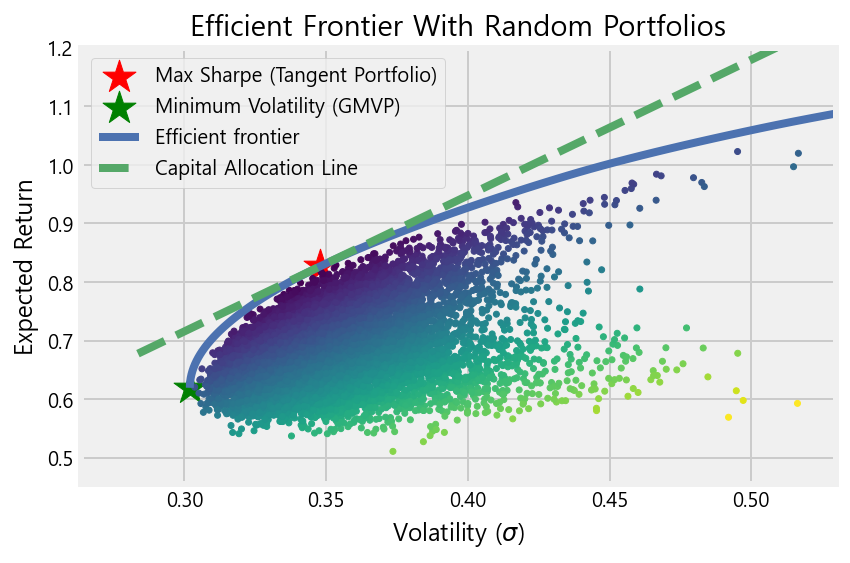

In [11]:
#  Plots for mu-std space

fig, ax = plt.subplots()

# Plot the tangency portfolio
ax.scatter(std_tangent, ret_tangent, marker="*", s=300, c="r", label="Max Sharpe (Tangent Portfolio)")
# Plot the minimum volatility portfolio
ax.scatter(std_min, ret_min, marker="*", s=300, c="g", label="Minimum Volatility (GMVP)")

# Plot the Efficient Frontier
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Plot the Capital Allocation Line
optimum_sharpe = (ret_tangent - risk_free_rate) / std_tangent
cal(optimum_sharpe, risk_free_rate)

# Generate random portfolios
n_samples = 10000
w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
rets = w.dot(ef.expected_returns)
stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Output
ax.set_title("Efficient Frontier With Random Portfolios")
ax.set_ylabel("Expected Return")
ax.set_xlabel(r"Volatility ($\sigma$)")
ax.legend()
ax.set_xlim(right= 0.53)
ax.set_ylim(top= 1.2)
plt.tight_layout()
plt.show()

<hr style="border:2px solid gray">
We are able to draw the capital allocation line simply using the risk free rate as the y-intercept and the tangent portfolio sharpe ratio as the slope as can be seen in the graph above.

The efficient frontier is also drawn, which shows the upper portion of the hyperbole shape of the curve, starting from minimum variance portfolio and beyond.

It is very evident from the shape of random portfolios shaded under the efficient frontier, the entire frontier is likely to be a hyperbola.
<hr style="border:2px solid gray">


--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation(Tangent Portfolio)

Expected annual return: 82.7%
Annual volatility: 34.8%
Sharpe Ratio: 2.32

Weights for each stock
--------------------------------------------------------------------------------
나노신소재 : 0.25659
대성파인텍 : 0.0
대주전자재료 : 0.08883
신성이엔지보통주 : 0.0848
아바코 : 0.0
알에스오토메이션 : 0.0304
주성엔지니어링 : 0.26275
주식회사케이씨씨 : 0.13478
코미코 : 0.09001
한화솔루션보통주 : 0.05184


<AxesSubplot: xlabel='Weight'>

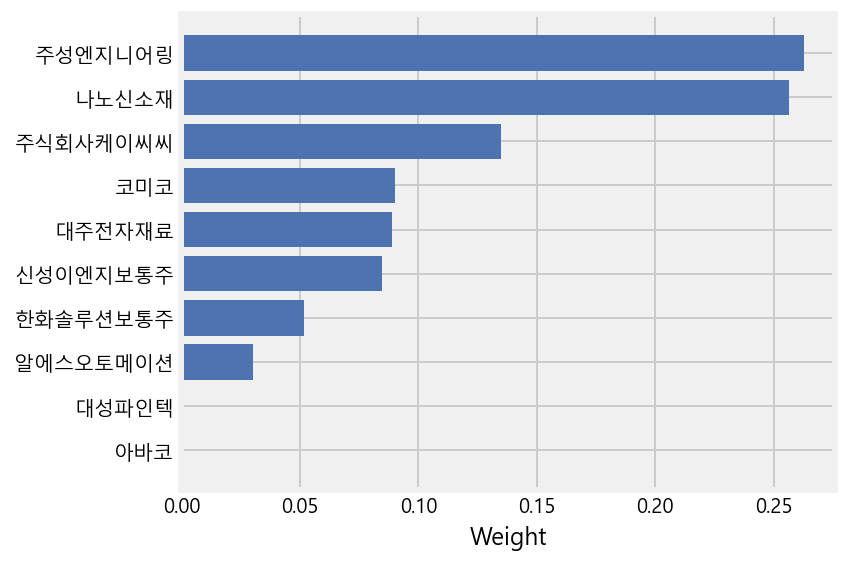

In [12]:
from pypfopt.plotting import plot_weights

# Tangent portfolio expected return, standard deviation, and weights
print("-"*80)
print("Maximum Sharpe Ratio Portfolio Allocation(Tangent Portfolio)\n")
ef_max_sharpe.portfolio_performance(verbose=True)

print("\nWeights for each stock")
print("-"*80)
for k, v in ef_max_sharpe.clean_weights().items():
	print(k, ":", v)
plot_weights(ef_max_sharpe.clean_weights())

--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation(GMVP)

Expected annual return: 61.9%
Annual volatility: 30.2%
Sharpe Ratio: 1.99

Weights for each stock
--------------------------------------------------------------------------------
나노신소재 : 0.04246
대성파인텍 : 0.0066
대주전자재료 : 0.06083
신성이엔지보통주 : 0.04912
아바코 : 0.14443
알에스오토메이션 : 0.09256
주성엔지니어링 : 0.09036
주식회사케이씨씨 : 0.22594
코미코 : 0.18017
한화솔루션보통주 : 0.10753


<AxesSubplot: xlabel='Weight'>

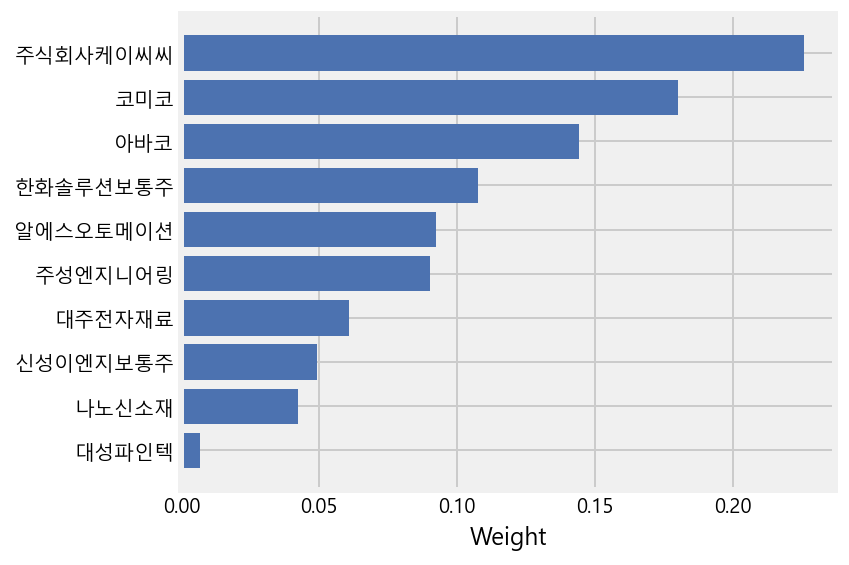

In [13]:
# Global minimum variance portfolio expected return, standard deviation, and weights
print("-"*80)
print("Minimum Volatility Portfolio Allocation(GMVP)\n")
min_vol.portfolio_performance(verbose=True)

print("\nWeights for each stock")
print("-"*80)
for k,v in min_vol.clean_weights().items():
	print(k,":", v)
plot_weights(min_vol.clean_weights())

<hr style="border:2px solid gray">

The numbers above suggests the selected stocks have very high annualized expected return and sharpe ratios. Tangent portfolio's expected return is 82.7% with a sharpe ratio of 2.32 and GMVP's expected return is 61.9% with a sharpe ratio of 1.99! These results are likely suffering from survivorship bias, where the stocks selected were best performers from the solar panel industry and not the entire universe from it. However, comparing the expected weight, return, and volatility of the tangent portfolio and minimum variance portfolio, some insights can be observed.
- The tangent portfolio gives heavier weight to stocks that had higher sharpe ratios compared to the minimum variance portfolio
- The relationship between risk and reward trade-off is obvious but each point on the efficient frontier are not neccessarily equal in such trade-off


<hr style="border:2px solid gray">

<hr style="border:2px solid gray">
From the following utility function, we can calculate the optimal portfolio given risk Aversion level "A".

$$Eu(\tilde{W}) \ = \mu \ - \frac{1}{2}A\sigma^2$$

With slope of indifference curve $ = \ A\sigma \ = Ay^*\sigma_T $  and slope of CAL $\frac{E(R_T)-R_f}{\sigma_T}$ We can obtain for $y^*$ which is the weight of tangent portfolio in final optimal portfolio given parameter "A"

$$ y^* \ = \frac{E(R_T)-R_f}{A\sigma^2_T} $$


<hr style="border:2px solid gray">

In [14]:

A = [50, 100, 200]

def optimal_portfolio(expected_return_t, risk_free_rate, A, std, weights):
	# Function to calculate optimal portfolio parameters given risk aversion "A"
	variance = std ** 2
	y = (expected_return_t - risk_free_rate) / (A * (variance)) # Optimal tangent portfolio demand
	wf = 1 - y						# Risk free asset allocation
	optimal_stock_weights = {k:v*y for k,v in weights.items()}
	expected_return_p = expected_return_t * y + wf * risk_free_rate
	variance_p = y * variance
	std_p = variance_p ** 0.5

	return ({
			"Portfolio Expected Return": expected_return_p, 
			"Portfolio Variance": variance_p, 
			"Portfolio Standard Deviation": std_p,
			"Tangent Portfolio Weight": y,
			"Risk Free Asset Weight": wf,
			}, optimal_stock_weights)
	

In [15]:
for a in A:
	portfolio = optimal_portfolio(ret_tangent, 
								risk_free_rate, 
								a, 
								std_tangent, 
								ef_max_sharpe.clean_weights())
	print()
	print("-" * 80)
	print(f"Risk Aversion Parameter: A = {a}")
	for k, v in portfolio[0].items():
		print(f"{k} : {round(v, 5)}")
	
	print("\n*Investment Weights for Each Stock*")
	for k, v in portfolio[1].items():
		print(f"{k} : {round(v, 3)}")




--------------------------------------------------------------------------------
Risk Aversion Parameter: A = 50
Portfolio Expected Return : 0.12756
Portfolio Variance : 0.01614
Portfolio Standard Deviation : 0.12704
Tangent Portfolio Weight : 0.13329
Risk Free Asset Weight : 0.86671

*Investment Weights for Each Stock*
나노신소재 : 0.034
대성파인텍 : 0.0
대주전자재료 : 0.012
신성이엔지보통주 : 0.011
아바코 : 0.0
알에스오토메이션 : 0.004
주성엔지니어링 : 0.035
주식회사케이씨씨 : 0.018
코미코 : 0.012
한화솔루션보통주 : 0.007

--------------------------------------------------------------------------------
Risk Aversion Parameter: A = 100
Portfolio Expected Return : 0.07378
Portfolio Variance : 0.00807
Portfolio Standard Deviation : 0.08983
Tangent Portfolio Weight : 0.06665
Risk Free Asset Weight : 0.93335

*Investment Weights for Each Stock*
나노신소재 : 0.017
대성파인텍 : 0.0
대주전자재료 : 0.006
신성이엔지보통주 : 0.006
아바코 : 0.0
알에스오토메이션 : 0.002
주성엔지니어링 : 0.018
주식회사케이씨씨 : 0.009
코미코 : 0.006
한화솔루션보통주 : 0.003

----------------------------------------------------------

<hr style="border:2px solid gray">

To conclude, by optimizing for risk aversion level of the investor (given by parameter "A"), portfolios can be constructed along the capital allocation line, which provides the highest expected return per risk (a.k.a sharpe ratio). The higher the aversion to risk, less weight is allocated to the tangent portfolio and more to the risk free asset. As seen from the calculations above, risk aversion level of 50 already assumes a fairly small allocation for the tangent portfolio at around 13.3%, while risk aversion level of 200 barely allocates to the tangent portfolio at all, which is around 3.3% of the final portfolio. 

<hr style="border:2px solid gray">

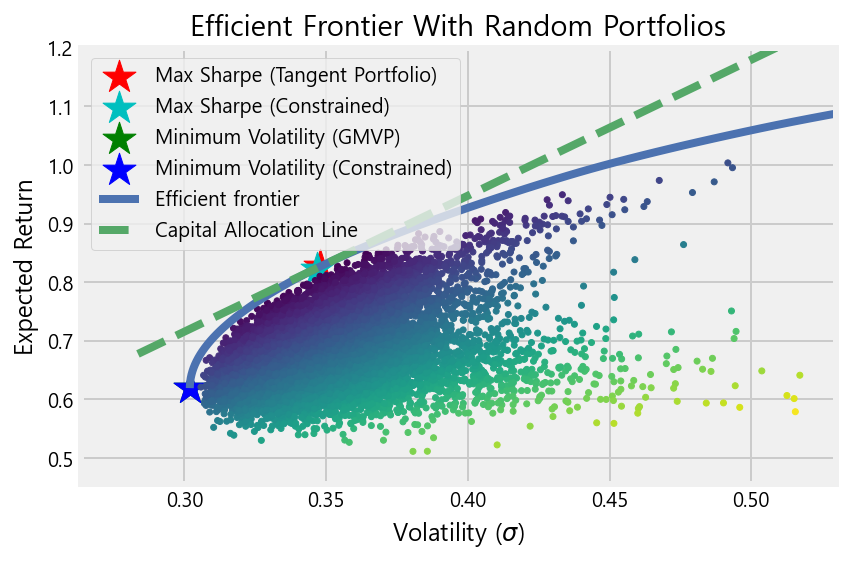

In [21]:
from pypfopt import objective_functions

ef = EfficientFrontier(mu, S)

# Separate efficient frontier objects for different optimization
ef_max_sharpe = ef.deepcopy()
min_vol = ef.deepcopy()

constrained_ef = ef.deepcopy()
constrained_ef.add_constraint(lambda x: x >= 0.01)
constrained_sharpe = constrained_ef.deepcopy()
constrained_min = constrained_ef.deepcopy()


# Find the tangency portfolio
ef_max_sharpe.max_sharpe()
ret_tangent, std_tangent, _ = ef_max_sharpe.portfolio_performance()

constrained_sharpe.max_sharpe()
ret_tan_cons, std_tan_cons, _ = constrained_sharpe.portfolio_performance()

# Find the global minimum variance portfolio (GMVP)
min_vol.min_volatility()
ret_min, std_min, _ = min_vol.portfolio_performance()

constrained_min.min_volatility()
ret_min_cons, std_min_cons, _ = constrained_min.portfolio_performance()

#  Plots for mu-std space

fig, ax = plt.subplots()

# Plot the tangency portfolio
ax.scatter(std_tangent, ret_tangent, marker="*", s=300, c="r", label="Max Sharpe (Tangent Portfolio)")
ax.scatter(std_tan_cons, ret_tan_cons, marker="*", s=300, c="c", label="Max Sharpe (Constrained)")

# Plot the minimum volatility portfolio
ax.scatter(std_min, ret_min, marker="*", s=300, c="g", label="Minimum Volatility (GMVP)")
ax.scatter(std_min_cons, ret_min_cons, marker="*", s=300, c="b", label="Minimum Volatility (Constrained)")

# Plot the Efficient Frontier
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Plot the Capital Allocation Line
optimum_sharpe = (ret_tangent - risk_free_rate) / std_tangent
cal(optimum_sharpe, risk_free_rate)

# Generate random portfolios
n_samples = 10000
w = np.random.dirichlet(np.ones(ef.n_assets), n_samples)
rets = w.dot(ef.expected_returns)
stds = np.sqrt(np.diag(w @ ef.cov_matrix @ w.T))
sharpes = rets / stds
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Output
ax.set_title("Efficient Frontier With Random Portfolios")
ax.set_ylabel("Expected Return")
ax.set_xlabel(r"Volatility ($\sigma$)")
ax.legend()
ax.set_xlim(right= 0.53)
ax.set_ylim(top= 1.2)
plt.tight_layout()
plt.show()

--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation(GMVP)

Expected annual return: 61.9%
Annual volatility: 30.2%
Sharpe Ratio: 1.98

Weights for each stock
--------------------------------------------------------------------------------
나노신소재 : 0.04219
대성파인텍 : 0.01
대주전자재료 : 0.0608
신성이엔지보통주 : 0.04834
아바코 : 0.14388
알에스오토메이션 : 0.09236
주성엔지니어링 : 0.08992
주식회사케이씨씨 : 0.22575
코미코 : 0.18002
한화솔루션보통주 : 0.10674


<AxesSubplot: xlabel='Weight'>

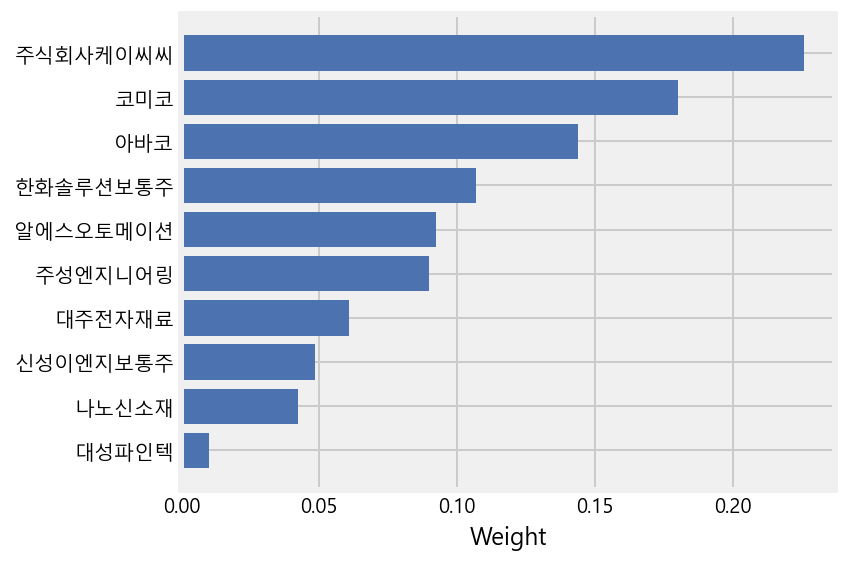

In [22]:

# Global minimum variance portfolio expected return, standard deviation, and weights
print("-"*80)
print("Minimum Volatility Portfolio Allocation(GMVP)\n")
constrained_min.portfolio_performance(verbose=True)

print("\nWeights for each stock")
print("-"*80)
for k,v in constrained_min.clean_weights().items():
	print(k,":", v)
plot_weights(constrained_min.clean_weights())

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation(Tangent Portfolio)

Expected annual return: 82.3%
Annual volatility: 34.7%
Sharpe Ratio: 2.31

Weights for each stock
--------------------------------------------------------------------------------
나노신소재 : 0.25515
대성파인텍 : 0.01
대주전자재료 : 0.08706
신성이엔지보통주 : 0.08113
아바코 : 0.01
알에스오토메이션 : 0.02863
주성엔지니어링 : 0.25854
주식회사케이씨씨 : 0.13232
코미코 : 0.0884
한화솔루션보통주 : 0.04877


<AxesSubplot: xlabel='Weight'>

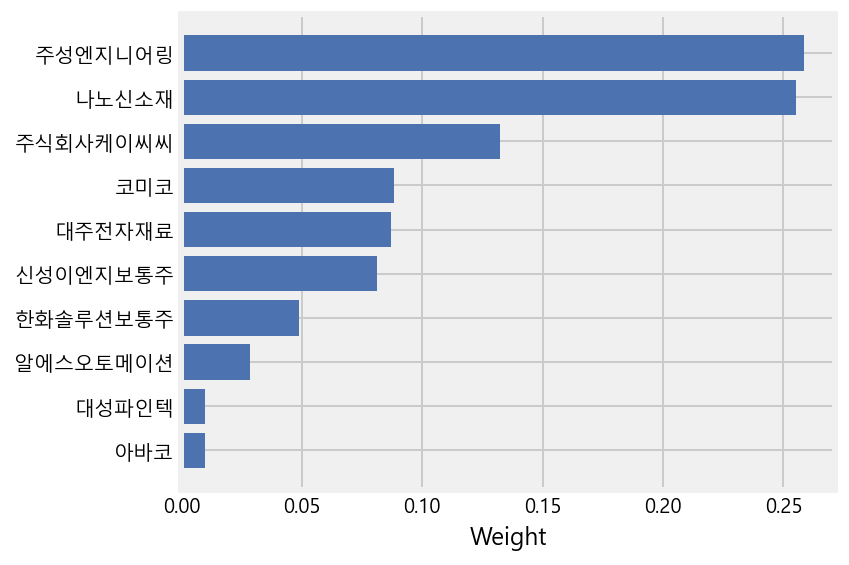

In [23]:

# Tangent portfolio expected return, standard deviation, and weights
print("-"*80)
print("Maximum Sharpe Ratio Portfolio Allocation(Tangent Portfolio)\n")
constrained_sharpe.portfolio_performance(verbose=True)

print("\nWeights for each stock")
print("-"*80)
for k, v in constrained_sharpe.clean_weights().items():
	print(k, ":", v)
plot_weights(constrained_sharpe.clean_weights())